In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (40., 7.)
matplotlib.rcParams.update({'font.size': 22})

from scipy.special import legendre

import matplotlib
%matplotlib inline

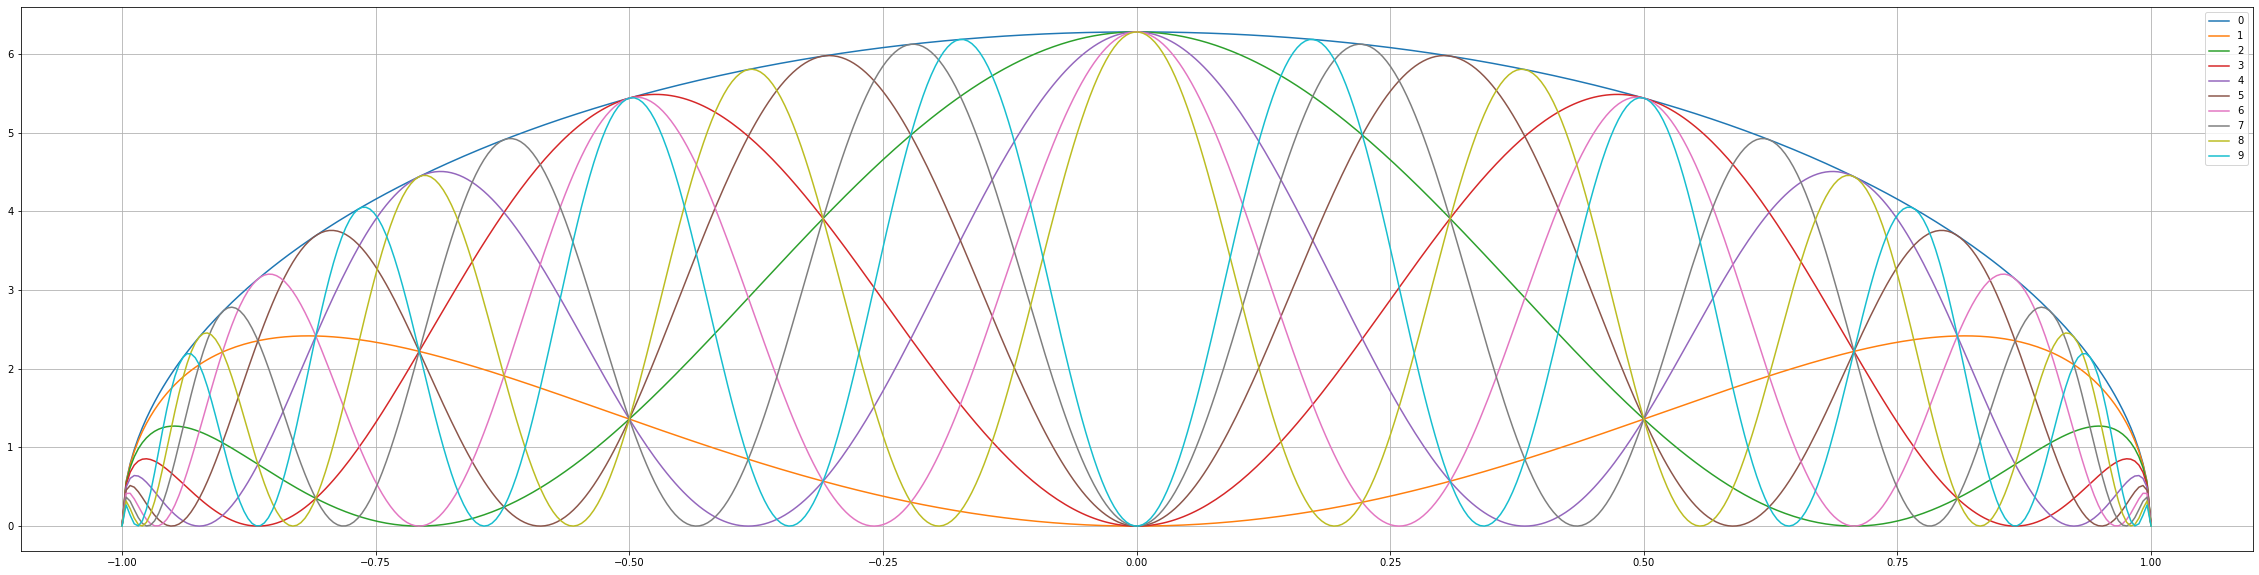

In [14]:
x = np.linspace(-1, 1, 500)
fig = plt.figure(figsize=(40,10))
for k in range(10) :
    plt.plot(x, 2 * np.pi * np.sqrt(1 - x**2) * (np.cos(k*np.arccos(x))**2), label=str(k))
plt.grid()
plt.legend()

1.0
1.000020000200009
1.0000400009999943
1.000060002800025
1.0000800060000663
1.0001000110001168
1.0001200182001824
1.0001400280002826
1.0001600408003917
1.0001800570005799


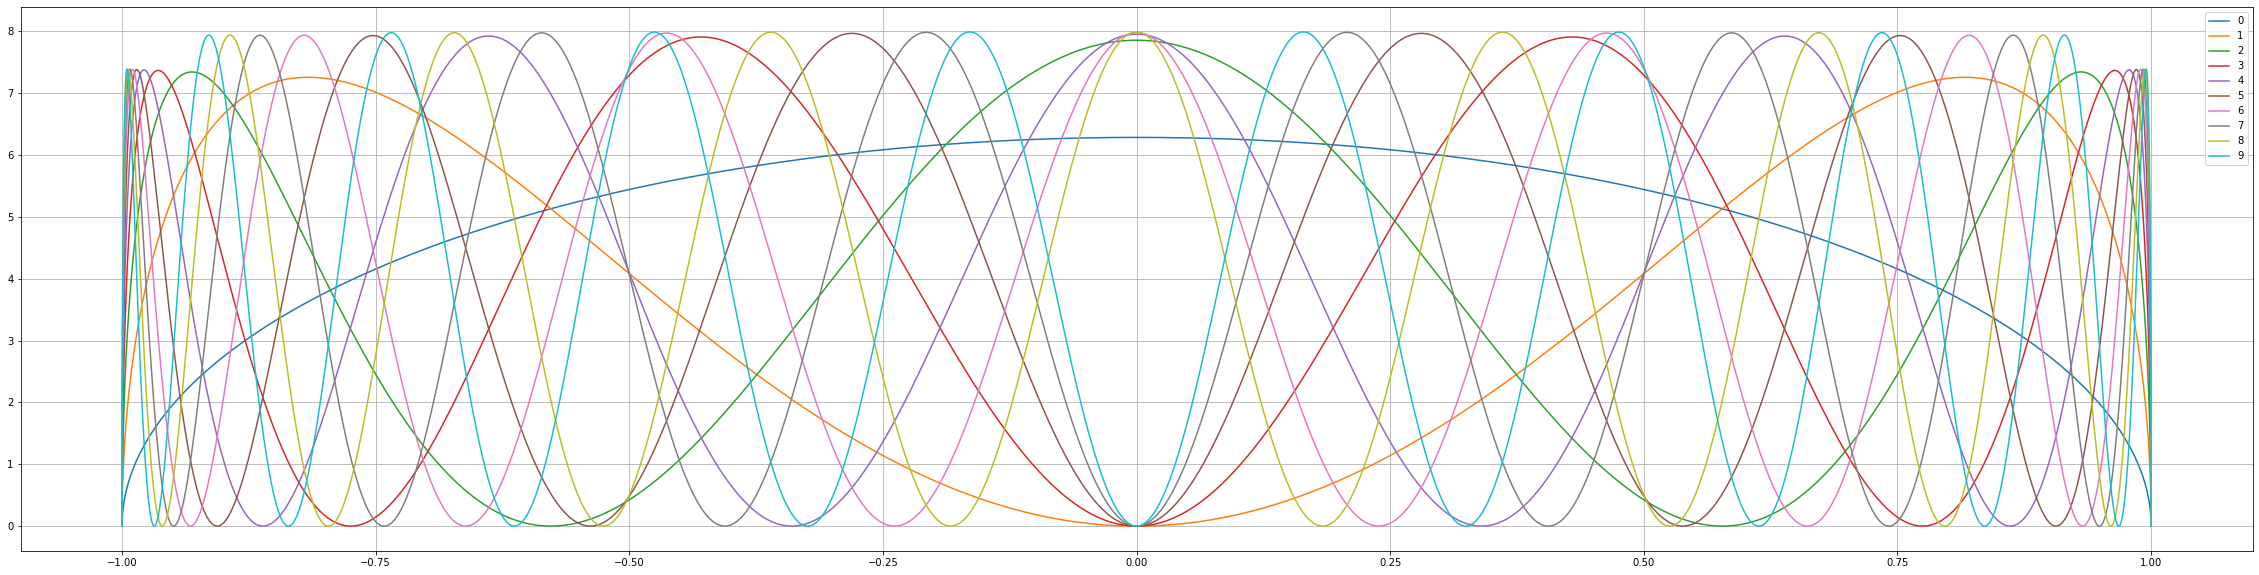

In [44]:
x = np.linspace(-1, 1, 100000)
fig = plt.figure(figsize=(40,10))
for k in range(10) :
    poly = legendre(k)
    evals = poly(x)**2 * (2*k + 1)
    print(sum(evals)/len(x))
    plt.plot(x, 2 * np.pi * np.sqrt(1 - x**2) * evals, label=str(k))
plt.grid()
plt.legend()
plt.show()

In [38]:
x = np.linspace(-1, 1, 50000)
poly = legendre(3)
#print(poly(x))
#print(poly(x)**2)
evals = poly(x)**2 
print(sum(evals) * (2*4- 1) / len(x))

1.000120011200229


# Chebychev Weight vs (Legendre) Optimal Weight

In [6]:
polys = [legendre(k) for k in range(200)]

In [5]:
polys = [legendre(k) for k in range(100)]
def christoffel(x, kmax) :
    return np.sum([polys[k](x)**2 * (2*k + 1) for k in range(kmax)])

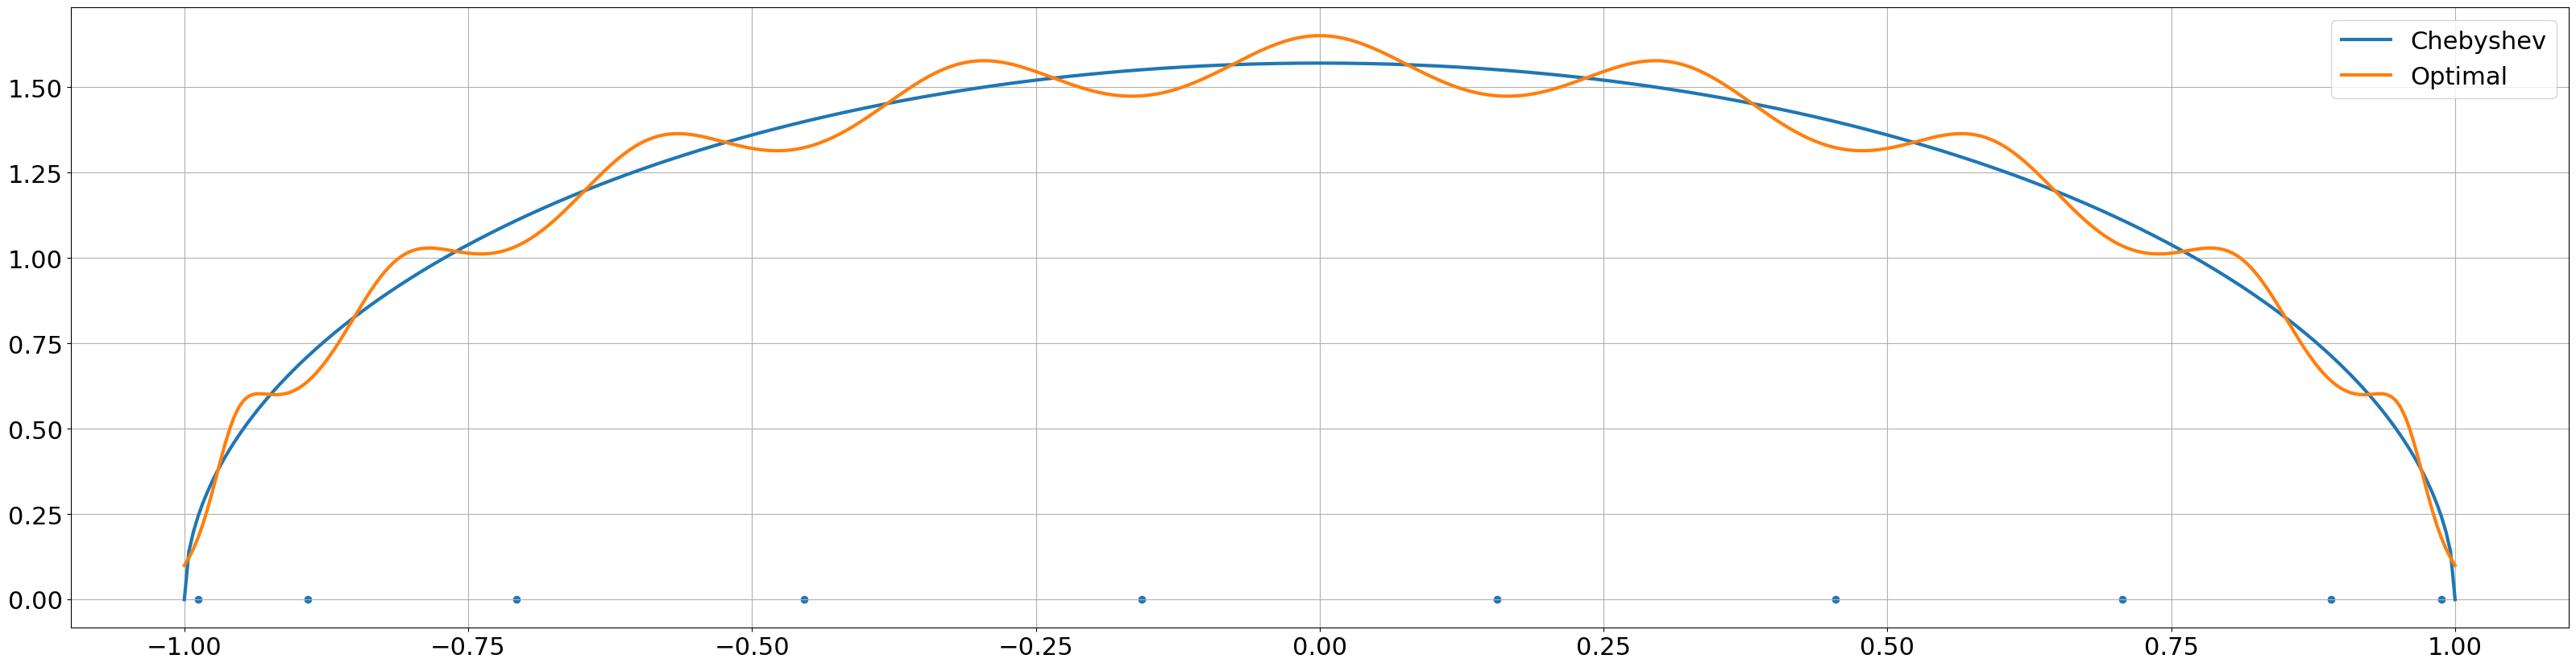

In [98]:
x = np.linspace(-1, 1, 500)
cheb = np.pi/2 * np.sqrt(1-x**2)
opti = np.zeros(x.shape)
kmax = 10
for k in range(kmax) :
    poly = legendre(k)
    opti += poly(x)**2 * (2*k + 1)
    
nodes = np.array([np.cos((2*k+1)*np.pi/2/kmax) for k in range(kmax)])

fig = plt.figure(figsize=(40,10))
plt.plot(x, cheb, lw=3, label='Chebyshev')
plt.plot(x, kmax/opti, lw=3, label='Optimal')
plt.scatter(nodes, np.zeros(nodes.shape))
plt.grid()
plt.legend()
plt.show()

# Norm and Condition Number of WLS

In [3]:
from MultiIndex import *
import legendreutil, plotutil

def get_properties(samples, multis) :
    weights = np.pi/2 * np.prod(np.sqrt(1-samples**2), axis=0)
    L = legendreutil.evaluate_basis(samples, multis)
    for ii in range(L.shape[0]) : L[ii,:] *= np.sqrt(weights[ii])
    G = np.dot(L.T, L)/multis.size() - np.eye(multis.size())
    
    L_svd = np.linalg.svd(L, compute_uv=False)
    G_svd = np.linalg.svd(G, compute_uv=False)
    return min(L_svd), max(L_svd), min(G_svd), max(G_svd)

res = get_properties(np.array([[np.cos((2*k+1)*np.pi/2/10) for k in range(10)]]), TotalDegreeSet(dim=1,order=3))

In [7]:
multis = TotalDegreeSet(dim=1,order=9)
d = multis.dim
m = multis.size()
kmax = 10
trials = 1000

n = list(range(3*kmax, 30 * m * int(np.log(m))))
c_rand = np.zeros((len(n),trials,4))
c_det = np.zeros((len(n),4))
for i in range(len(n)) :
    c_det[i] = get_properties(np.array([[np.cos((2*k+1)*np.pi/2/n[i]) for k in range(n[i])]]),multis)
    for j in range(trials) :
        c_rand[i,j] = get_properties(np.sin(np.random.uniform(low=-3*np.pi/2, high=np.pi/2, size=(d, n[i]))), multis)

In [8]:
def plot_random(ax, arr, label) :
    c = ax.plot(n, np.mean(arr,axis=1), lw=3, label=label)
    ax.fill_between(n, np.min(arr,axis=1), np.max(arr,axis=1), color=c[0].get_color(), alpha=.2)

ValueError: operands could not be broadcast together with shapes (570,1000) (570,) 

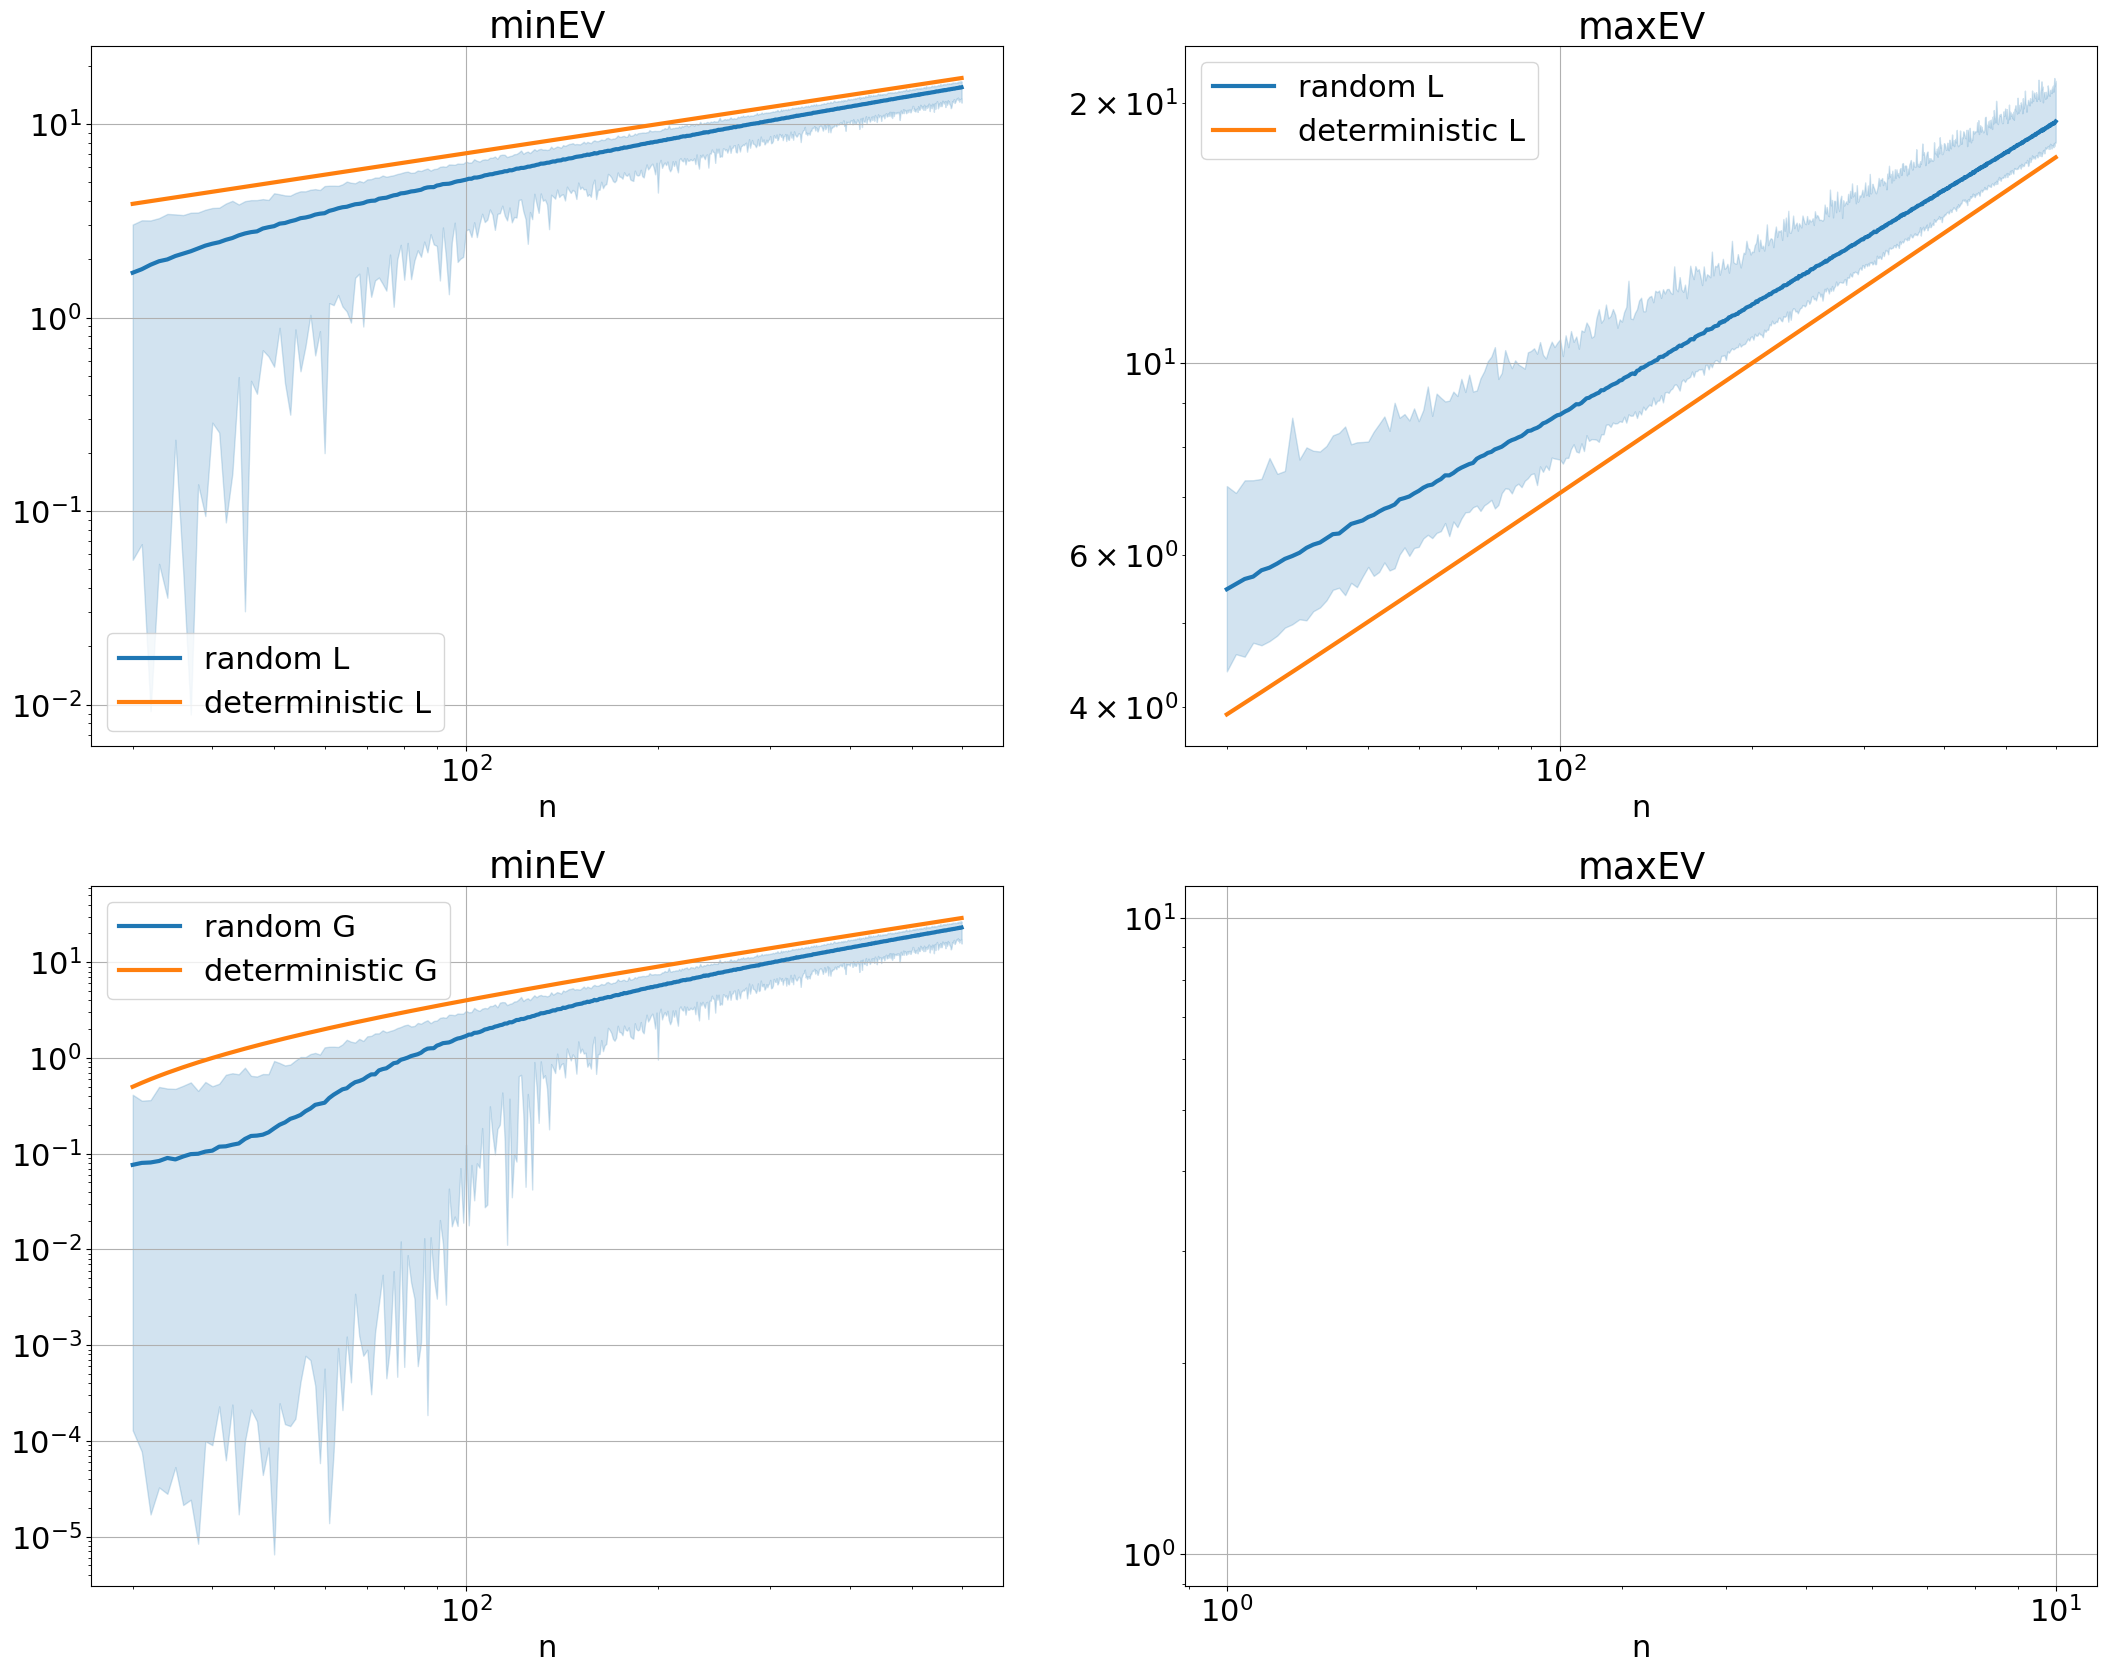

In [10]:
fig = plt.figure(figsize=(40,20))

ax = plotutil.get_ax(fig, nx=3, ny=2, idx=1, logaxis=['x', 'y'], xlabel='n', title='minEV')
plot_random(ax, c_rand[:,:,0], 'random L')
ax.plot(n, c_det[:,0], lw=3, label='deterministic L')
ax.legend()
ax = plotutil.get_ax(fig, nx=3, ny=2, idx=4, logaxis=['x', 'y'], xlabel='n', title='minEV')
plot_random(ax, c_rand[:,:,2], 'random G')
ax.plot(n, c_det[:,2], lw=3, label='deterministic G')
ax.legend()

ax = plotutil.get_ax(fig, nx=3, ny=2, idx=2, logaxis=['x', 'y'], xlabel='n', title='maxEV')
plot_random(ax, c_rand[:,:,1], 'random L')
ax.plot(n, c_det[:,1], lw=3, label='deterministic L')
ax.legend()
ax = plotutil.get_ax(fig, nx=3, ny=2, idx=5, logaxis=['x', 'y'], xlabel='n', title='maxEV')
plot_random(ax, c_rand[:,:,3]/n, 'random G')
ax.plot(n, c_det[:,3]/n, lw=3, label='deterministic G')
ax.legend()

ax = plotutil.get_ax(fig, nx=3, ny=2, idx=3, logaxis=['x', 'y'], xlabel='n', title='maxEV/minEV')
plot_random(ax, c_rand[:,:,1]/c_rand[:,:,0], 'random L')
ax.plot(n, c_det[:,1]/c_det[:,0], lw=3, label='deterministic L')
ax.vlines(200, 1,10, lw=3, color='r')
ax.legend()
ax = plotutil.get_ax(fig, nx=3, ny=2, idx=6, logaxis=['x', 'y'], xlabel='n', title='maxEV/minEV')
plot_random(ax, c_rand[:,:,3]/c_rand[:,:,2], 'random G')
ax.plot(n, c_det[:,3]/c_det[:,2], lw=3, label='deterministic G')
ax.vlines(200, 1,100, lw=3, color='r')
#ax.hlines(.5, 30, 600, lw=3, color='k')
ax.legend()
plt.show()

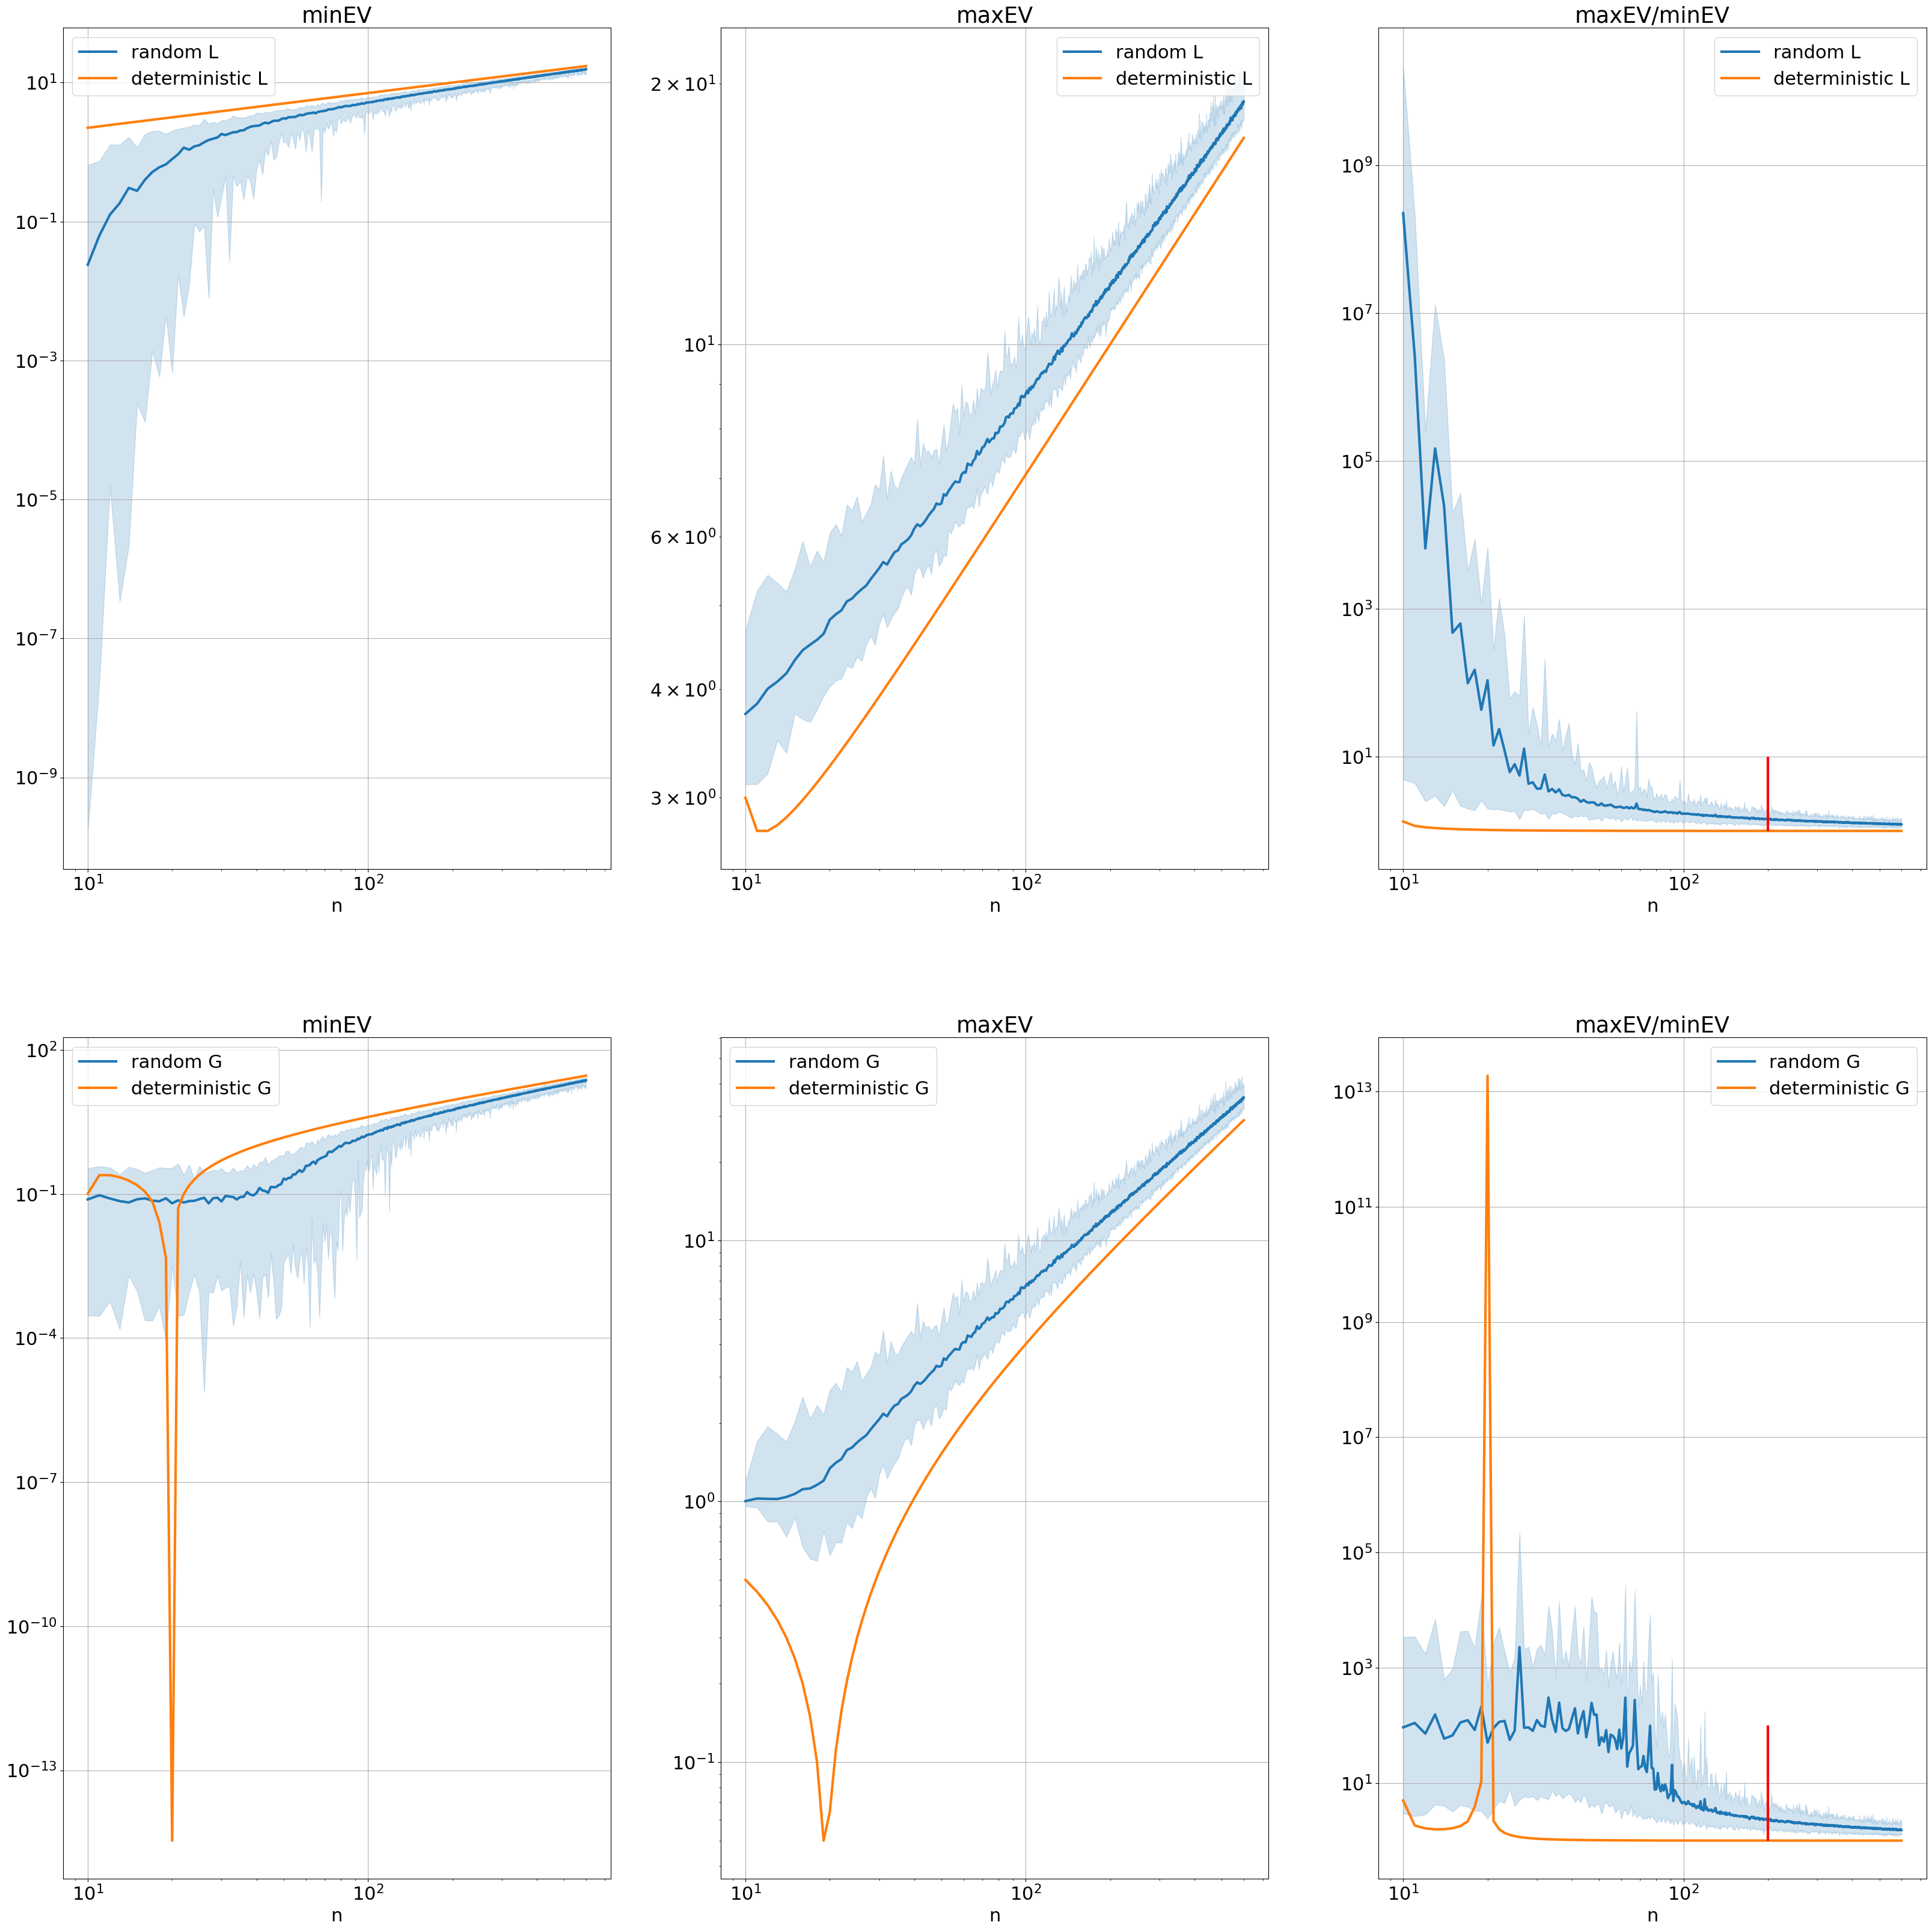

In [82]:
fig = plt.figure(figsize=(40,40))

ax = plotutil.get_ax(fig, nx=3, ny=2, idx=1, logaxis=['x', 'y'], xlabel='n', title='minEV')
plot_random(ax, c_rand[:,:,0], 'random L')
ax.plot(n, c_det[:,0], lw=3, label='deterministic L')
ax.legend()
ax = plotutil.get_ax(fig, nx=3, ny=2, idx=4, logaxis=['x', 'y'], xlabel='n', title='minEV')
plot_random(ax, c_rand[:,:,2], 'random G')
ax.plot(n, c_det[:,2], lw=3, label='deterministic G')
ax.legend()

ax = plotutil.get_ax(fig, nx=3, ny=2, idx=2, logaxis=['x', 'y'], xlabel='n', title='maxEV')
plot_random(ax, c_rand[:,:,1], 'random L')
ax.plot(n, c_det[:,1], lw=3, label='deterministic L')
ax.legend()
ax = plotutil.get_ax(fig, nx=3, ny=2, idx=5, logaxis=['x', 'y'], xlabel='n', title='maxEV')
plot_random(ax, c_rand[:,:,3], 'random G')
ax.plot(n, c_det[:,3], lw=3, label='deterministic G')
ax.legend()

ax = plotutil.get_ax(fig, nx=3, ny=2, idx=3, logaxis=['x', 'y'], xlabel='n', title='maxEV/minEV')
plot_random(ax, c_rand[:,:,1]/c_rand[:,:,0], 'random L')
ax.plot(n, c_det[:,1]/c_det[:,0], lw=3, label='deterministic L')
ax.vlines(200, 1,10, lw=3, color='r')
ax.legend()
ax = plotutil.get_ax(fig, nx=3, ny=2, idx=6, logaxis=['x', 'y'], xlabel='n', title='maxEV/minEV')
plot_random(ax, c_rand[:,:,3]/c_rand[:,:,2], 'random G')
ax.plot(n, c_det[:,3]/c_det[:,2], lw=3, label='deterministic G')
ax.vlines(200, 1,100, lw=3, color='r')
#ax.hlines(.5, 30, 600, lw=3, color='k')
ax.legend()
plt.show()

In [74]:
for i in range(5) :
    samples = None
    cond = np.infty
    while cond > 1.35 :
        samples = np.sin(np.random.uniform(low=-3*np.pi/2, high=np.pi/2, size=(d, 10 * m * int(np.log(m)))))
        _, _, a, b = get_properties(samples, multis)
        cond = b/a
    print(cond)
    s = np.concatenate((s, samples), axis=None)

1.315321056739707
1.3174835088873025
1.3469228799880888
1.3425706814850762
1.3439680911374081


In [10]:
kmax = 10 * m * int(np.log(m))
nodes = np.array([np.cos((2*k+1)*np.pi/2/kmax) for k in range(kmax)])

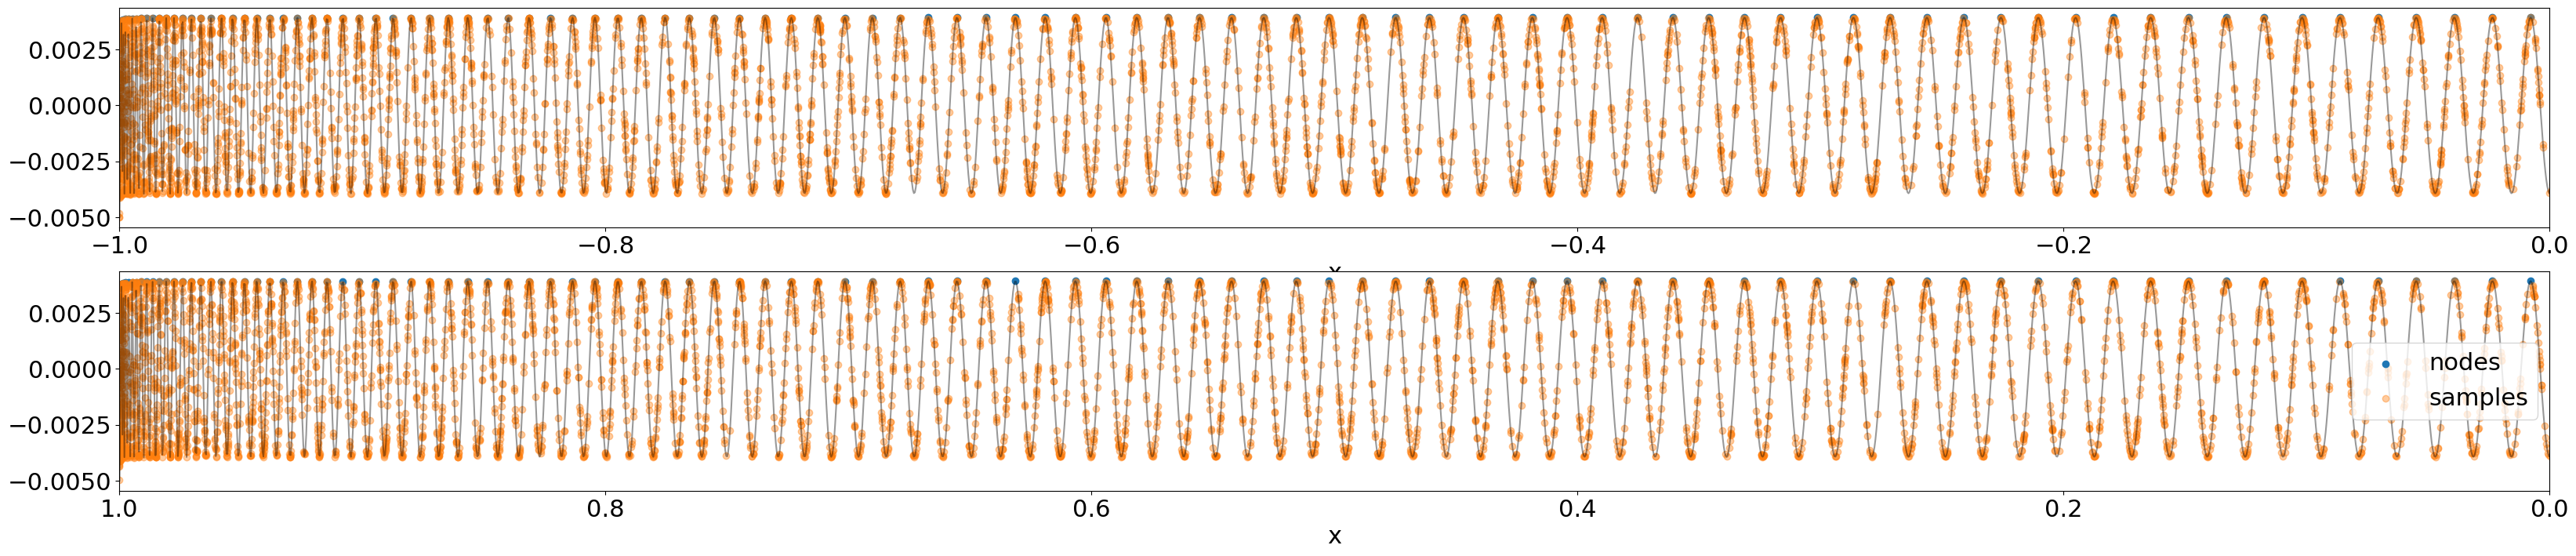

In [55]:
x = np.linspace(-1,1,5000)
c = np.pi/2 * np.sqrt(1-x**2)
o = [kmax/christoffel(xi, kmax) for xi in x]

fig = plt.figure(figsize=(40,8))
ax = plotutil.get_ax(fig, nx=1, ny=2, idx=1, title='')
ax.plot(x,c-o, 'k', alpha=.4)
ax.scatter(nodes, [np.pi/2 * np.sqrt(1-n**2) - kmax/christoffel(n, kmax) for n in nodes], label='nodes')
ax.scatter(s, [np.pi/2 * np.sqrt(1-n**2) - kmax/christoffel(n, kmax) for n in s], label='samples', alpha=.4)
ax.set_xlim([-1,0])
ax.grid()
ax = plotutil.get_ax(fig, nx=1, ny=2, idx=2, title='')
ax.plot(x,c-o, 'k', alpha=.4)
ax.scatter(nodes, [np.pi/2 * np.sqrt(1-n**2) - kmax/christoffel(n, kmax) for n in nodes], label='nodes')
ax.scatter(s, [np.pi/2 * np.sqrt(1-n**2) - kmax/christoffel(n, kmax) for n in s], label='samples', alpha=.4)
ax.set_xlim([0,1])
plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.show()

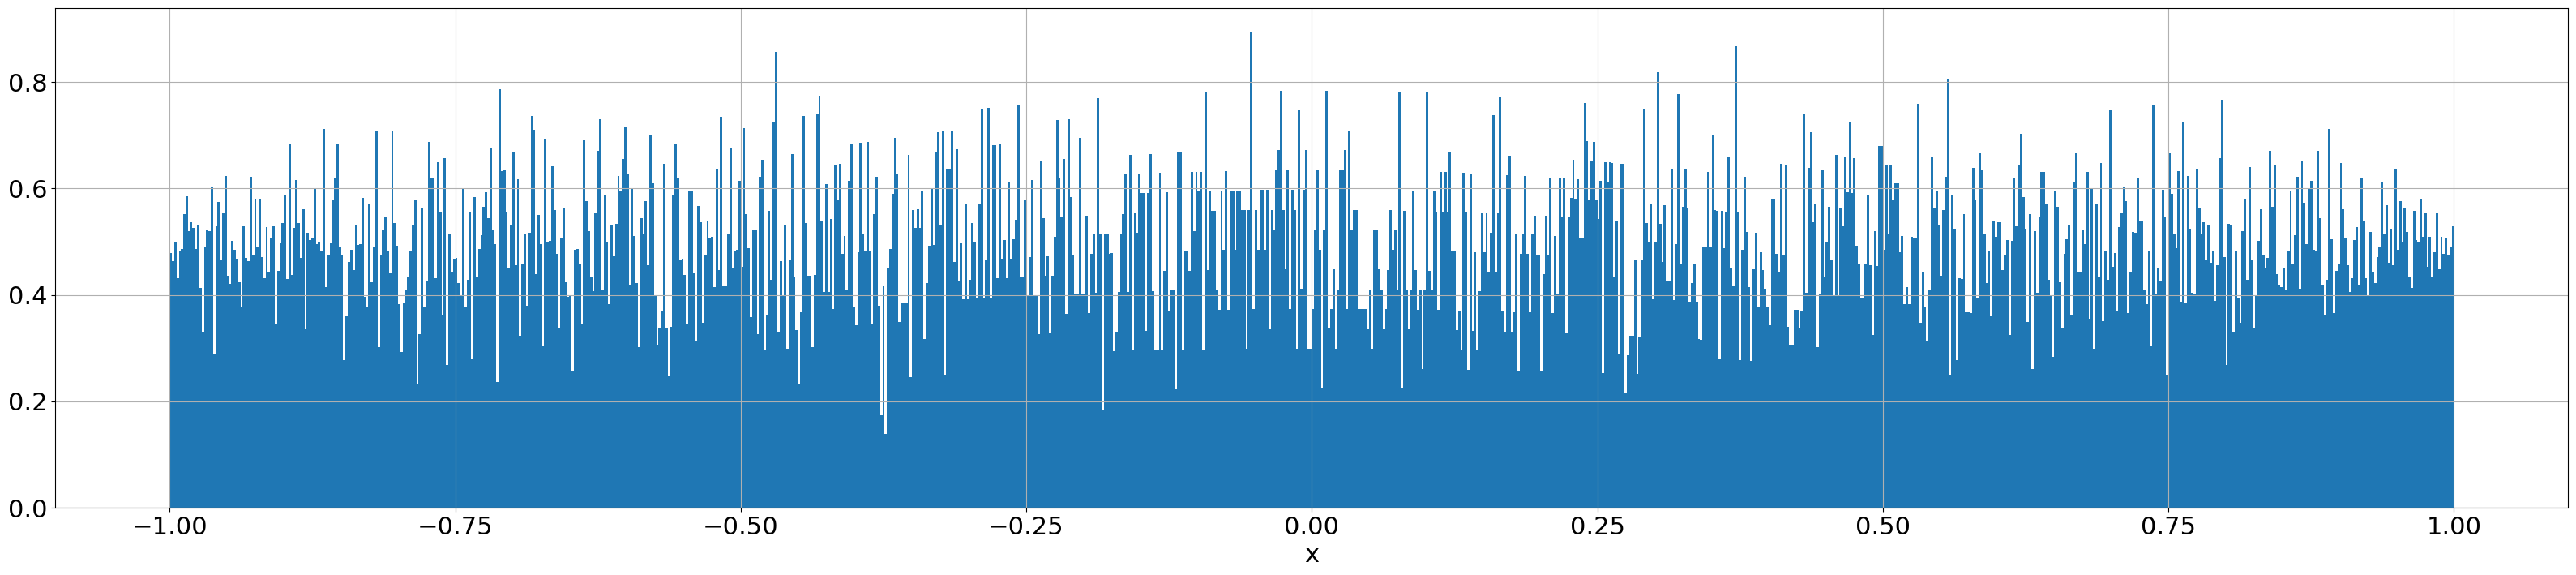

In [72]:
fig = plt.figure(figsize=(40,8))
ax = plotutil.get_ax(fig, nx=1, ny=1, idx=1, title='')
ax.hist(s, bins=1000, weights = np.pi/2 * np.sqrt(1-s**2), density=True)

plt.show()

Why do we rely on random points for weighted least squares?
Theory: Optimal sampling measure, density is Christoffel function
Optimal sampling measure has structure - minima at Chebychev points

Experiments: evaluate condition number for random and deterministic points (over #samples)
WLS Theory: need 10*m*log(m) samples for reasonable condition number